In [59]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline

In [19]:
from pandas_datareader import data as pdr

In [55]:
date_end = dt.datetime.today()
date_start = date_end - dt.timedelta(30)

In [57]:
SP500 = pdr.DataReader('^GSPC', 'yahoo', date_start, date_end)

In [61]:
SP500.describe()

High          Low         Open        Close        Volume  \
count    22.000000    22.000000    22.000000    22.000000  2.200000e+01   
mean   3102.142700  3053.069081  3080.229537  3080.386375  5.705815e+09   
std      80.604401    84.796850    81.372834    81.900649  1.584016e+09   
min    2956.760010  2933.590088  2948.050049  2948.510010  1.042954e+09   
25%    3052.422424  2985.394958  3018.029907  3031.329956  4.973448e+09   
50%    3104.209961  3041.589966  3084.969971  3073.705078  5.830745e+09   
75%    3150.377441  3105.747498  3134.847412  3124.272522  6.416752e+09   
max    3233.129883  3196.000000  3213.419922  3232.389893  8.617590e+09   

         Adj Close  
count    22.000000  
mean   3080.386375  
std      81.900649  
min    2948.510010  
25%    3031.329956  
50%    3073.705078  
75%    3124.272522  
max    3232.389893

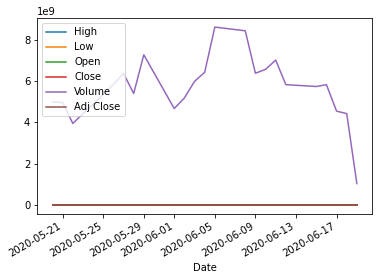

In [62]:
SP500.plot()

Text(0, 0.5, 'lowest price')

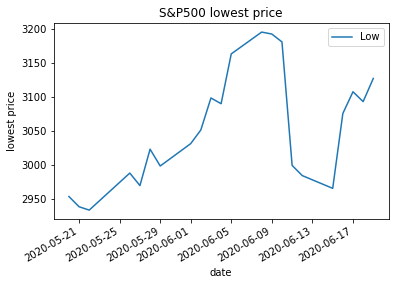

In [65]:
graph3 = SP500.plot(y = 'Low',title='S&P500 lowest price')
graph3.set_xlabel('date')
graph3.set_ylabel('lowest price')

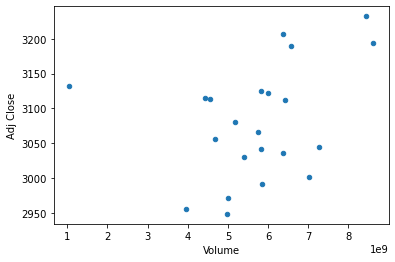

In [70]:
SP500.plot.scatter('Volume', 'Adj Close')

## Econdb 
provides economic data from 90+ official statistical agencies. Free API allows access to the complete Econdb database of time series aggregated into datasets.
https://www.econdb.com/

In [82]:
import os
import pandas_datareader.data as web

web.DataReader('ticker=RGDPUS', 'econdb')

TableName                                                                     T10106
SeriesCode                                                                    A191RX
Table              Table 1.1.6. Real Gross Domestic Product, Chained Dollars (A) (Q)
Series description                                            Gross domestic product
CL_UNIT                                                                        Level
CL_FREQ                                                                            Q
TIME_PERIOD                                                                         
2015-07-01                                                   17463222               
2015-10-01                                                   17468902               
2016-01-01                                                   17556840               
2016-04-01                                                   17639416               
2016-07-01                                                   17735074               
2016-10-01                                                   17824232               
2017-01-01                                                   17925256               
2017-04-01                                                   18021048               
2017-07-01                                                   18163558               
2017-10-01                                                   18322464               
2018-01-01                                                   18438254               
2018-04-01                                                   18598136               
2018-07-01                                                   18732720               
2018-10-01                                                   18783548               
2019-01-01                                                   18927280               
2019-04-01                                                   19021860               
2019-07-01                                                   19121112               
2019-10-01                                                   19221970               
2020-01-01                                                   18974702

In [85]:
web.DataReader('GDP', 'fred', date_start, date_end)

Empty DataFrame
Columns: [GDP]
Index: []

In [77]:
pdr.get_data_fred('GS10', date_start, date_end)

Empty DataFrame
Columns: [GS10]
Index: []

In [86]:
web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', date_start, date_end)

Empty DataFrame
Columns: [CPIAUCSL, CPILFESL]
Index: []

## World Bank
pandas users can easily access thousands of panel data series from the World Bank’s World Development Indicators by using the wb I/O functions.

In [89]:
from pandas_datareader import wb
wb.search('gdp.*capita.*const')

id                                               name  \
680     6.0.GDPpc_constant  GDP per capita, PPP (constant 2011 internation...   
9258        NY.GDP.PCAP.KD                 GDP per capita (constant 2010 US$)   
9260        NY.GDP.PCAP.KN                      GDP per capita (constant LCU)   
9262     NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2017 internation...   
9263  NY.GDP.PCAP.PP.KD.87  GDP per capita, PPP (constant 1987 internation...   

     unit                        source  \
680                      LAC Equity Lab   
9258       World Development Indicators   
9260       World Development Indicators   
9262       World Development Indicators   
9263              WDI Database Archives   

                                             sourceNote  \
680   GDP per capita based on purchasing power parit...   
9258  GDP per capita is gross domestic product divid...   
9260  GDP per capita is gross domestic product divid...   
9262  GDP per capita based on purchasing power parit...   
9263                                                      

                                     sourceOrganization            topics  
680        b'World Development Indicators (World Bank)'  Economy & Growth  
9258  b'World Bank national accounts data, and OECD ...  Economy & Growth  
9260  b'World Bank national accounts data, and OECD ...  Economy & Growth  
9262  b'International Comparison Program, World Bank...  Economy & Growth  
9263                                                b''

In [90]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)